Correlation and Welch ANOVA for Movies dataset.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8)



In [44]:
df = pd.read_csv("/Users/rutujajadhav/Desktop/Correlation/data/movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Missing Data

In [45]:
df.shape

(7668, 15)

In [46]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
             ...   
country      object
budget      float64
gross       float64
company      object
runtime     float64
Length: 15, dtype: object

In [47]:
df.isna().sum()


name           0
rating        77
genre          0
year           0
released       2
            ... 
country        3
budget      2171
gross        189
company       17
runtime        4
Length: 15, dtype: int64

In [48]:
df = df.dropna()

In [49]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
           ..
country     0
budget      0
gross       0
company     0
runtime     0
Length: 15, dtype: int64

In [50]:
df = df.reset_index(drop=True)

In [51]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [52]:
df.shape

(5421, 15)

Checking if values in year column match the year in release dates of the release column

In [53]:
year_released = df[['year','released']]
year_released.head()


,year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"


In [54]:
year_released= year_released.astype(str)

In [55]:
count_of_year_rel_mismatch = 0

for i, row in year_released.iterrows():
    if row.year not in row.released:
        count_of_year_rel_mismatch += 1

print("number of rows where year and release dont match ="+ str(count_of_year_rel_mismatch))

number of rows where year and release dont match =708


In [56]:
#df['year_correct'] = df['released'].astype(str).str.replace('','')
#df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
#df.head()

Use YEAR column for dates instead of release year, as the years in both these dates don't match. (later - figure out how to extract only the year portion from the release column. tip - subset from the comma)

In [57]:
pd.set_option('display.max_rows', 10)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df = df.reset_index(drop=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [58]:
df['company'].drop_duplicates().sort_values(ascending = False)

2043                                thefyzz
4367                            micro_scope
4132                               i5 Films
3536                             i am OTHER
5235                                   erbp
                       ...                 
3941                       1818 Productions
1203                          1492 Pictures
5413                        .406 Production
802     "Weathering With You" Film Partners
2464        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

Hypothesis

Budget high CR with Gross
Company high CR with Gross

<function matplotlib.pyplot.show(close=None, block=None)>

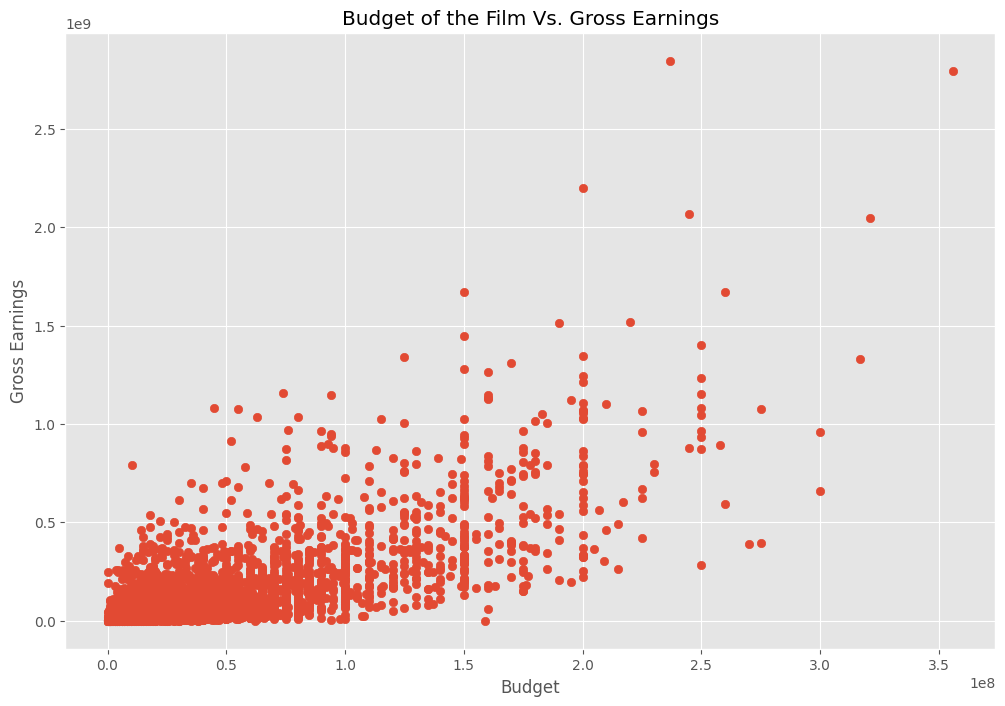

In [59]:
#scatter plot with budget vs gross

plt.scatter(x = df['budget'], y= df['gross'])
plt.title('Budget of the Film Vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

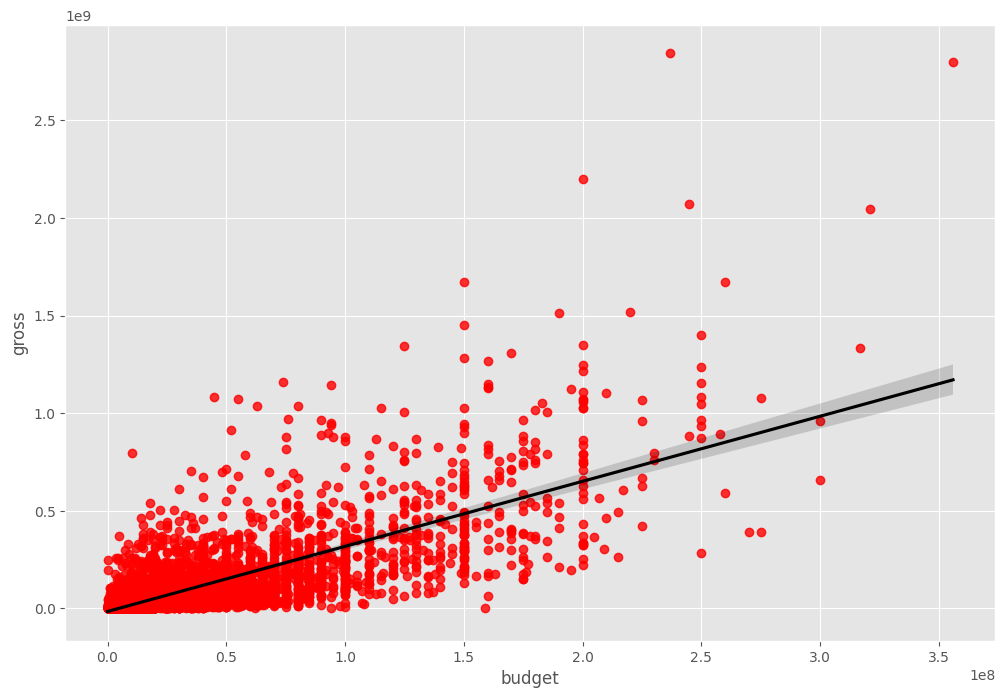

In [60]:
#Using seaborn to plot a regplot

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"black"})


Positive Correlation between Budget and Gross Earnings.

In [61]:
df_corr = df[['budget','gross','runtime','score','votes','year']]
#made a new data frame above since the .corr fucntion was throwing an error for string columns like movie title.
df_corr.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


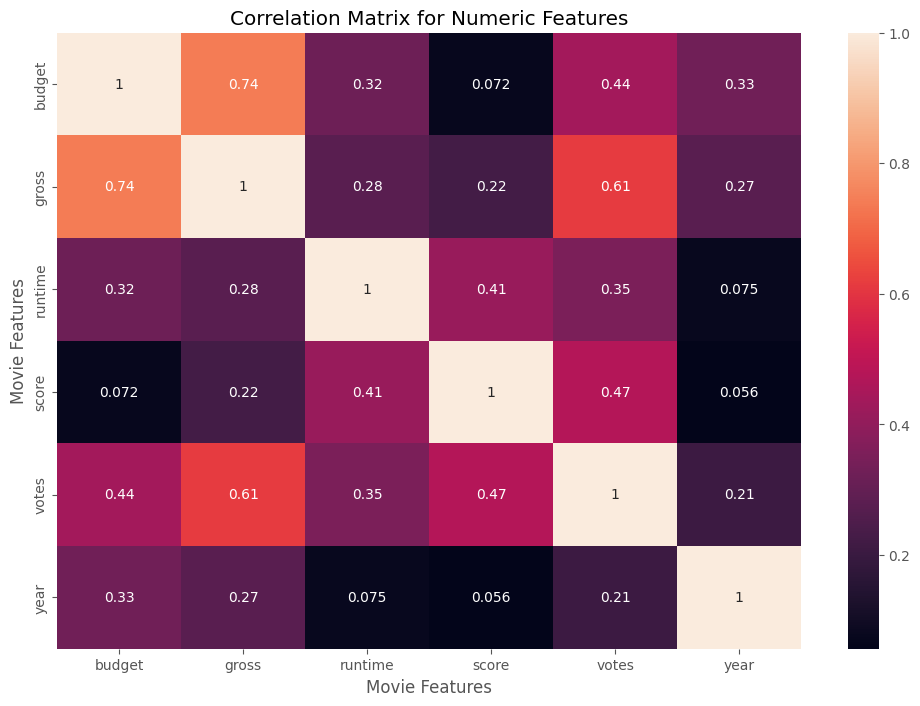

In [62]:
corr_matrix  = df_corr.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [67]:
df.iloc[0:10,:]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
5,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
7,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
8,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
9,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


Did movies with a particular star cast/ production house perform significantly better than others?
Things to consider...
1. Gross earnings for a particular category, whether its star, company, etc, when summed over a period of time may not account for time value of money. Therfore 'score' or rating column would be a more time-resilient measure of performance
2. Although score may be more time resilient - if it has been determined as an average (of votes) then it may be sentitive to outliers, i.e, few number of voters giving a higher raking may skew the score.
3. Using ANOVA, determine if there is a significant difference in the movie ratings of actors with the most no. movies (potentially more popular actors).
4. No. 3 can be repeated for other categories like genre.

In [105]:
df['star'].value_counts()


star
Nicolas Cage       40
Tom Hanks          38
Robert De Niro     38
Bruce Willis       34
Tom Cruise         33
                   ..
Nathan Phillips     1
Joe Alwyn           1
DJ Qualls           1
Kate Maberly        1
Will Friedle        1
Name: count, Length: 1845, dtype: int64

In [112]:
df_star = df[df['star'].isin(['Nicolas Cage','Tom Hanks','Robert De Niro'])]
df_star.reset_index(drop=True)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Toy Story 4,G,Animation,2019,"June 21, 2019 (United States)",7.7,217000.0,Josh Cooley,John Lasseter,Tom Hanks,United States,200000000.0,1.073395e+09,Pixar Animation Studios,100.0
1,Toy Story 3,G,Animation,2010,"June 18, 2010 (United States)",8.2,776000.0,Lee Unkrich,John Lasseter,Tom Hanks,United States,200000000.0,1.066971e+09,Walt Disney Pictures,103.0
2,The Da Vinci Code,PG-13,Mystery,2006,"May 19, 2006 (United States)",6.6,410000.0,Ron Howard,Akiva Goldsman,Tom Hanks,United States,125000000.0,7.600069e+08,Columbia Pictures,149.0
3,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0
4,The Croods,PG,Animation,2013,"March 22, 2013 (United States)",7.2,199000.0,Kirk DeMicco,Chris Sanders,Nicolas Cage,United States,135000000.0,5.872053e+08,DreamWorks Animation,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Red Rock West,R,Crime,1993,"May 14, 1993 (Italy)",7.0,21000.0,John Dahl,John Dahl,Nicolas Cage,United States,8000000.0,2.502551e+06,Propaganda Films,98.0
112,Joe,R,Crime,2013,"April 11, 2014 (United States)",6.9,46000.0,David Gordon Green,Gary Hawkins,Nicolas Cage,United States,4000000.0,2.431443e+06,Worldview Entertainment,117.0
113,Mandy,Not Rated,Horror,2018,"September 14, 2018 (United States)",6.5,68000.0,Panos Cosmatos,Panos Cosmatos,Nicolas Cage,United Kingdom,6000000.0,1.555203e+06,SpectreVision,121.0
114,The Irishman,R,Biography,2019,"November 27, 2019 (United States)",7.8,344000.0,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000.0,9.688530e+05,Tribeca Productions,209.0


Visualizing the difference in sore/rating for actors with highest number of movies.

<Axes: xlabel='score', ylabel='star'>

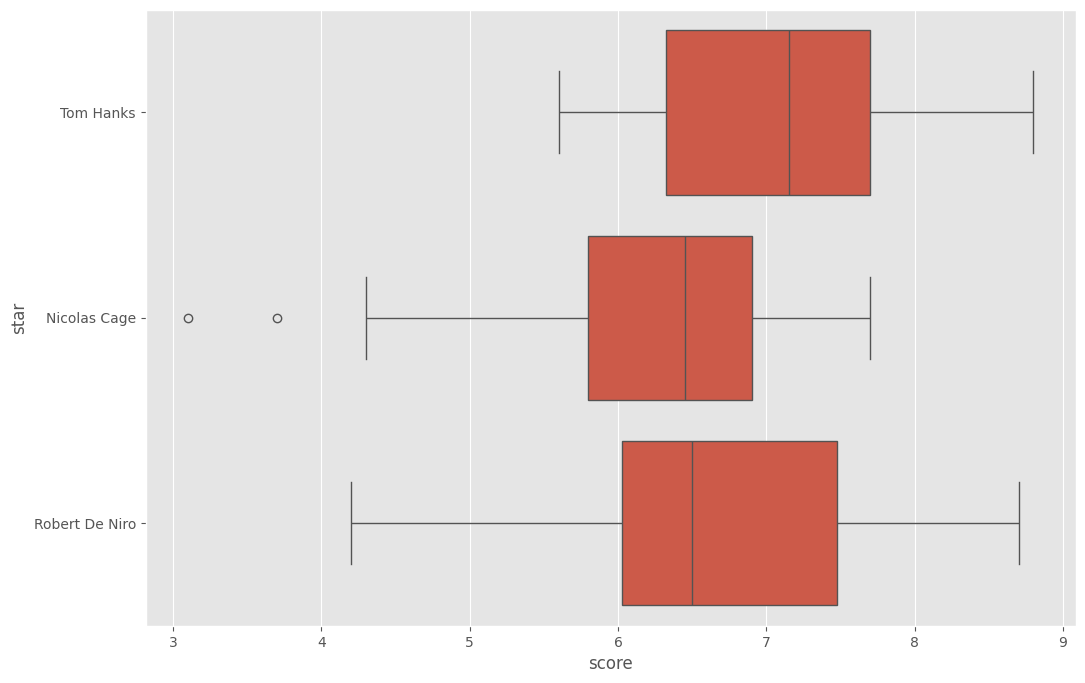

In [113]:
sns.boxplot(x='score', y = 'star', data = df_star)

To perform ANOVA, check if the score data in each factor level is:
Normal
Same Variance
Independent



In [131]:
from scipy import stats
#import scikit_posthocs as sp
import pingouin as pg



In [117]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data) #data needs to be an array
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")  

In [127]:
#Test for Normality

Nic_Cage_scores = df_star[df_star['star']=='Nicolas Cage']['score'].values
Tomh_H_scores = df_star[df_star['star']=='Tom Hanks']['score'].values
Rob_DN_scores = df_star[df_star['star']=='Robert De Niro']['score'].values

In [128]:
check_normality(Nic_Cage_scores)
check_normality(Tomh_H_scores)
check_normality(Rob_DN_scores)


p value:0.0083
Reject null hypothesis >> The data is not normally distributed
p value:0.4095
Fail to reject null hypothesis >> The data is normally distributed
p value:0.2713
Fail to reject null hypothesis >> The data is normally distributed


# one of the factor levels is not normally distributed => Use Welch ANOVA instead of ANOVA.

In [129]:
#Test for same variance

stat, pvalue_levene= stats.levene(Nic_Cage_scores,Tomh_H_scores,Rob_DN_scores)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.8871
Fail to reject null hypothesis >> The variances of the samples are same.


# Variances are same => optimal post-hoc analysis is the Tukey-HSD test (pingouin.pairwise_tukey()), if needed (ie if there is a sig diff in the scores of the movies of the three actors)

In [130]:
pg.welch_anova(data=df_star, dv='score', between='star')

,Source,ddof1,ddof2,F,p-unc,np2
0,star,2,75.067698,8.707734,0.000397,0.131913


P = 0.000397<0.05 => at least two levels have a significantly different score. Follow with Pairwise Tests to check which levels have a sig diff score.

Pairwise Tests
Using Bonferoni coeff to inc P values to adjust for potential false positive errors (as the no. of pairs increases, the number of tests increases quadratically, the chance of false positive also increases).

In [132]:
pg.pairwise_tests(data=df_star,dv='score', between= 'star', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,star,Nicolas Cage,Robert De Niro,False,True,-2.287920,75.987416,two-sided,0.024924,0.074773,bonf,2.184,-0.512630
1,star,Nicolas Cage,Tom Hanks,False,True,-4.191533,74.918819,two-sided,0.000075,0.000225,bonf,289.387,-0.935930
2,star,Robert De Niro,Tom Hanks,False,True,-1.771693,74.000000,two-sided,0.080562,0.241687,bonf,0.91,-0.402321


Based on pairwise tests, there seems to be a significant difference in the movie ratings of only two of the actors with highest number of movies - Nicolas Cage and Tom Hanks